### Init libraries

In [60]:
import numpy as np
import matplotlib.pyplot as plt

### Training function

In [63]:
def predict(X, theta):
    return X.dot(theta)

# Compute Mean Squared Error Loss
def compute_loss(Y, Y_hat):
    N = len(Y)
    return np.sum((Y - Y_hat) ** 2) / N

def compute_gradient(X, Y, Y_hat):
    N = len(Y)
    return X.T.dot((Y_hat - Y) * 2) / N

def update_gradient(theta, gradient, learning_rate=0.001):
    return theta - learning_rate * gradient

### Initialize parameters

In [64]:
# theta = [b weight1 weight2] # coef
theta = theta = np.array([10, 3, 2])

### Prepare data

| Experience | Education | Salary |
|-------------|------------|--------|
| 3           | 12         | 60     |
| 4           | 13         | 55     |
| 5           | 14         | 66     |
| 6           | 15         | 93     |

In [65]:
# Experience and Education
X = np.array([[3, 12], [4, 13], [5, 14], [6, 15]])
# Salary
y = np.array([60, 55, 66, 93])

# Test data (record 2 of dataset)
X_test = np.array([[1, 4, 13]])

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (4, 2)
y shape: (4,)


In [66]:
# Add bias term (intercept) to X
X_bias = np.c_[np.ones((X.shape[0], 1)), X]
print("X_bias shape:", X_bias.shape)
print("X_bias:\n", X_bias)
# Print shapes
print(f'Input shape: {X_bias.shape}')
print(f'Output shape: {y.shape}')

X_bias shape: (4, 3)
X_bias:
 [[ 1.  3. 12.]
 [ 1.  4. 13.]
 [ 1.  5. 14.]
 [ 1.  6. 15.]]
Input shape: (4, 3)
Output shape: (4,)


### Loss before training

In [67]:
X_test = np.array([[1, 4, 13]])
print("Initial theta:", theta)
print("y values (y):", y)
y_hat = predict(X_test, theta)
print("Predicted values (y_hat):", y_hat)
loss = compute_loss(y, y_hat)
print("Loss record 2 of sameple:", loss)

Initial theta: [10  3  2]
y values (y): [60 55 66 93]
Predicted values (y_hat): [48]
Loss record 2 of sameple: 635.5


### Train

In [71]:
epochs = 4
N = len(y)
learning_rate = 0.001
losses = []

for epoch in range(epochs):
    # Take 1 sample or N samples: 1 <= mini-batch <= N
    # Take whole dataset in this case

    # Forward pass
    # Predict y_hat
    y_hat = predict(X_bias, theta)

    # Compute loss Mean Squared Error
    loss = compute_loss(y, y_hat)
    losses.append(loss)

    # Backward pass
    gradient = compute_gradient(X_bias, y, y_hat)
    theta = update_gradient(theta, gradient, learning_rate)
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss}, Theta: {theta}')

Epoch 1/4, Loss: 129.43427922136902, Theta: [10.06866816  3.34961385  2.96762733]
Epoch 2/4, Loss: 102.26797535859747, Theta: [10.07525837  3.39097666  3.06830194]
Epoch 3/4, Loss: 92.81168056126987, Theta: [10.07874491  3.41801789  3.12672205]
Epoch 4/4, Loss: 89.49962678460061, Theta: [10.08040376  3.43662089  3.16025472]


### Loss after training

In [72]:
print("Initial theta:", theta)
print("y values (y):", y)
y_hat = predict(X_bias, theta)
print("Predicted values (y_hat):", y_hat)
loss = compute_loss(y, y_hat)
print("Final Loss:", loss)

Initial theta: [10.08040376  3.43662089  3.16025472]
y values (y): [60 55 66 93]
Predicted values (y_hat): [58.31332312 64.91019873 71.50707434 78.10394995]
Final Loss: 88.31927315873594


### Loss visualization

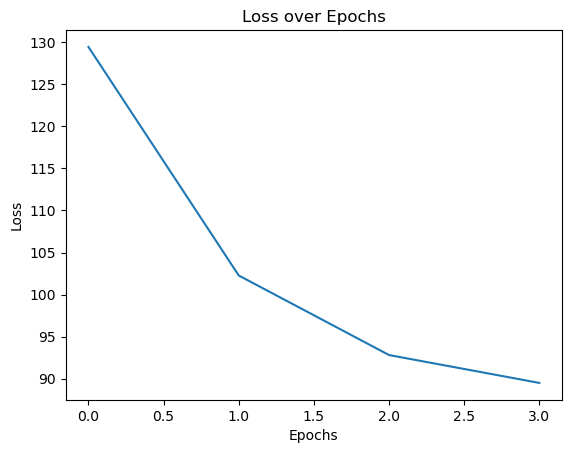

In [73]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.show()

Conclusion:
- When using training data for each epoch, the results seem to be stable and the loss reduce more. However because the number of samples and training epochs is still epochs is still quite small, we cannot conclude more.